In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

In [2]:
def compute_fourier_transformation(t,y):
    n = y.shape[0]
    dt = t[1]-t[0]
    a = np.zeros(n)
    b = np.zeros(n)
    omega = np.zeros(n)
    for i in range(n):
        iomega = i*(np.pi*2)/(t[-1]-t[0])
        omega[i] = iomega
        a[i] = np.sum(y[:]*np.sin(iomega*t[:])*dt)*(iomega/np.pi)
        b[i] = np.sum(y[:]*np.cos(iomega*t[:])*dt)*(iomega/np.pi)
        
    a = a[::-1]/(n-1)
    b = b[::-1]/(n-1)
    omega = omega[::-1]
    return a,b,omega

In [3]:
def reconstruct(t,a,b,omega):
    nfreq = a.shape[0]
    nsample = t.shape[0]
    y = np.zeros(nsample)
    for i in range(nfreq):
        y[:] += a[i]*np.sin(t*omega[i])+b[i]*np.cos(t*omega[i])
    return y

In [15]:
def plot_dft(t,a,b,omega_dft,original,label):
    freqs = [3,7,15,31,63]
    
    fig=plt.figure(figsize=(16,8), dpi=100, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111)
    
    for i in freqs:
        y_dft = reconstruct(t,a[:i],b[:i],omega_dft[:i])
        color = 'gray'#np.array([1,1,1])*(1.-0.5*float(i)/len(freqs))
        ax.plot(t/PI,y_dft,color=color,lw=1,label='{}th order'.format(1+int(i/4)))
    y_dft = reconstruct(t,a,b,omega_dft)
    
    ax.plot(t/PI,original,'r',lw=2,label='original')
    ax.plot(t/PI,y_dft,'--k',lw=2,label='reconstructed')
    
    ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
    ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
    ax.set_xlim([t[0]/PI,t[-1]/PI])
    plt.grid()
    plt.legend(loc='upper right')
    plt.xlabel('time')
    plt.ylabel('y')
    plt.title('fourier transformation\n '+label+' function')
    
    plt.savefig('dft_'+label+'_signal.png',dpi=200,format='png')
    plt.show()

In [9]:
def plot_spectrum(a,omega_dft,ind,label):
    omega_min = np.min(omega_dft[:ind])
    omega_max = np.max(omega_dft[:ind])
    
    fig=plt.figure(figsize=(16,8), dpi=100, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111)
    ax.stem(omega_dft[:ind],np.abs(a[:ind]),'r',label='sinus component',use_line_collection=True)
    ax.set_xlim([omega_max,omega_min])
    plt.xlabel('omega [rad]')
    plt.ylabel('amplitude')
    plt.title('amplitude spectrum\n '+label+' function')
    plt.legend(loc='upper right')
    plt.savefig('dft_'+label+'_spectrum.png',dpi=200,format='png')
    plt.show()

In [6]:
PI = np.pi

N = 1000
period = 2*np.pi
omega = 2*PI/period
index_omega_cut = 100
t = np.linspace(0,4*PI,N)
dt = t[1]-t[0]

square = np.sign(np.sin(omega*t))
triangle = np.cumsum(square)*dt/PI*2-1
sawtooth = np.mod(t,period)/period*2-1

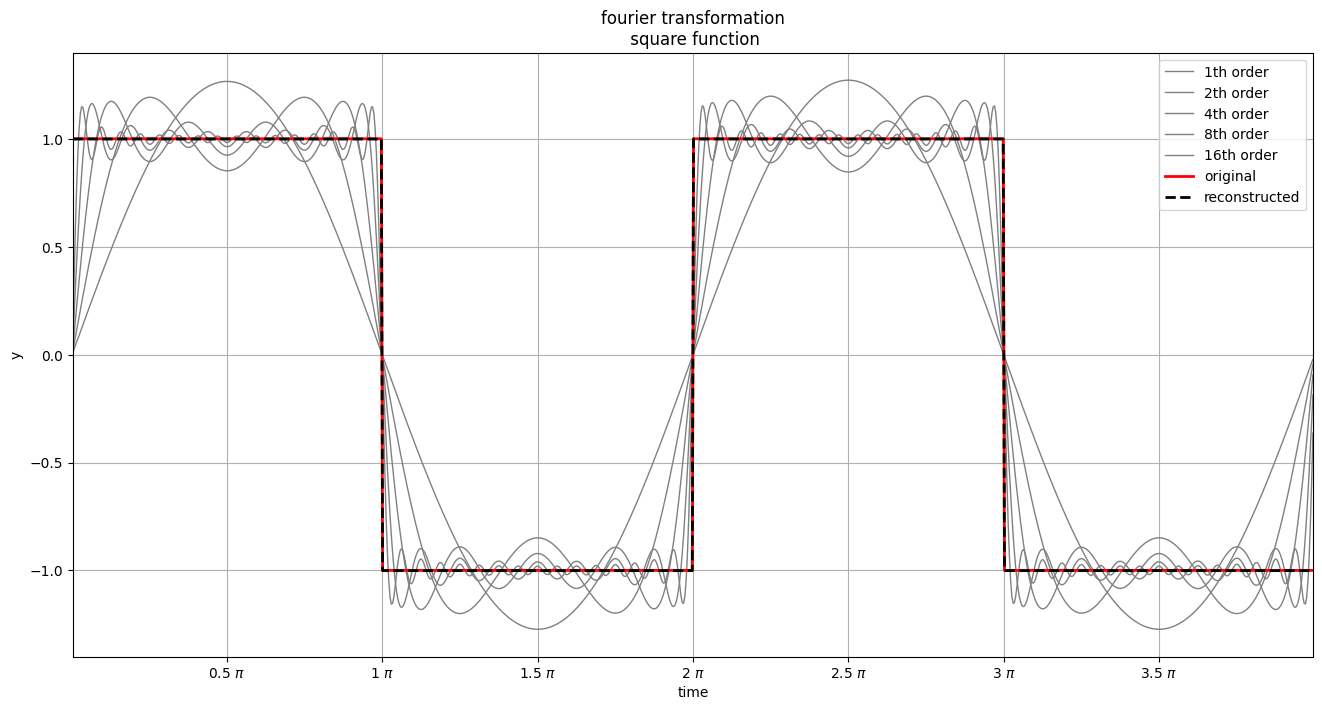

In [16]:
a,b,omega_dft = compute_fourier_transformation(t,square)
plot_dft(t[1:-1],a,b,omega_dft,square[1:-1],'square')

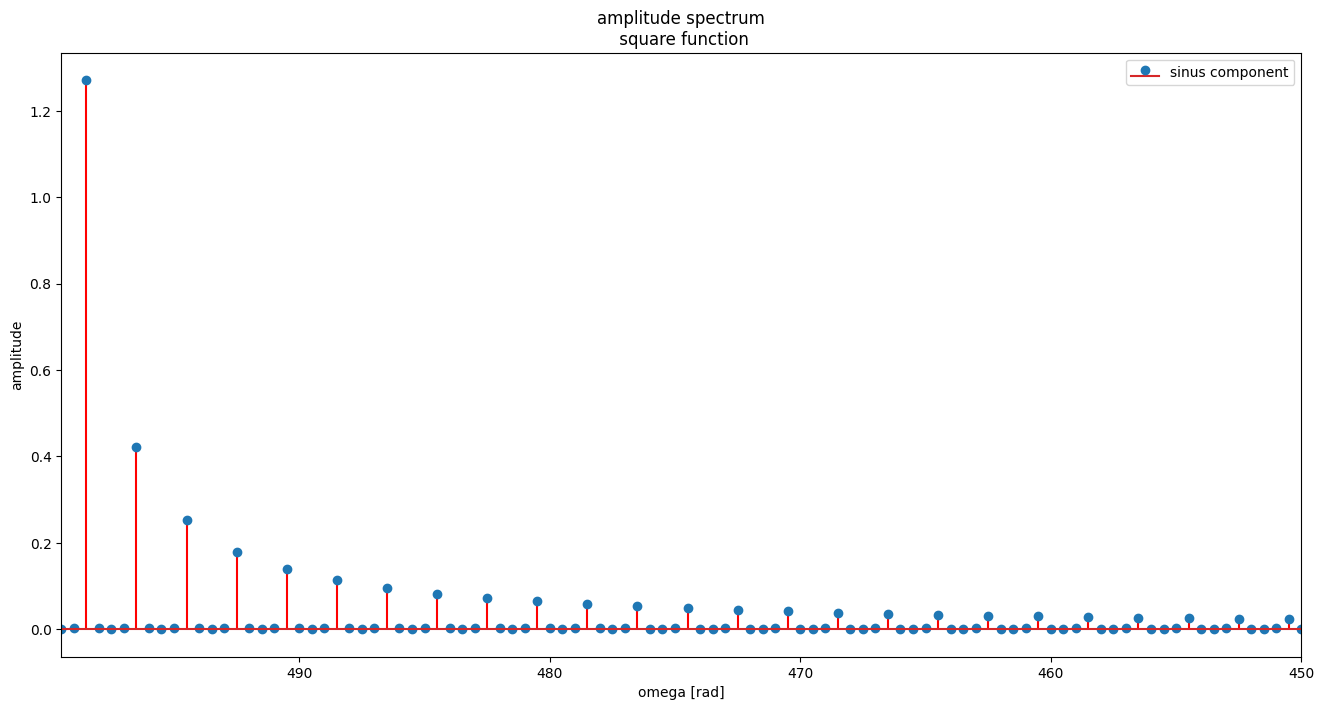

In [10]:
plot_spectrum(a,omega_dft,index_omega_cut,'square')

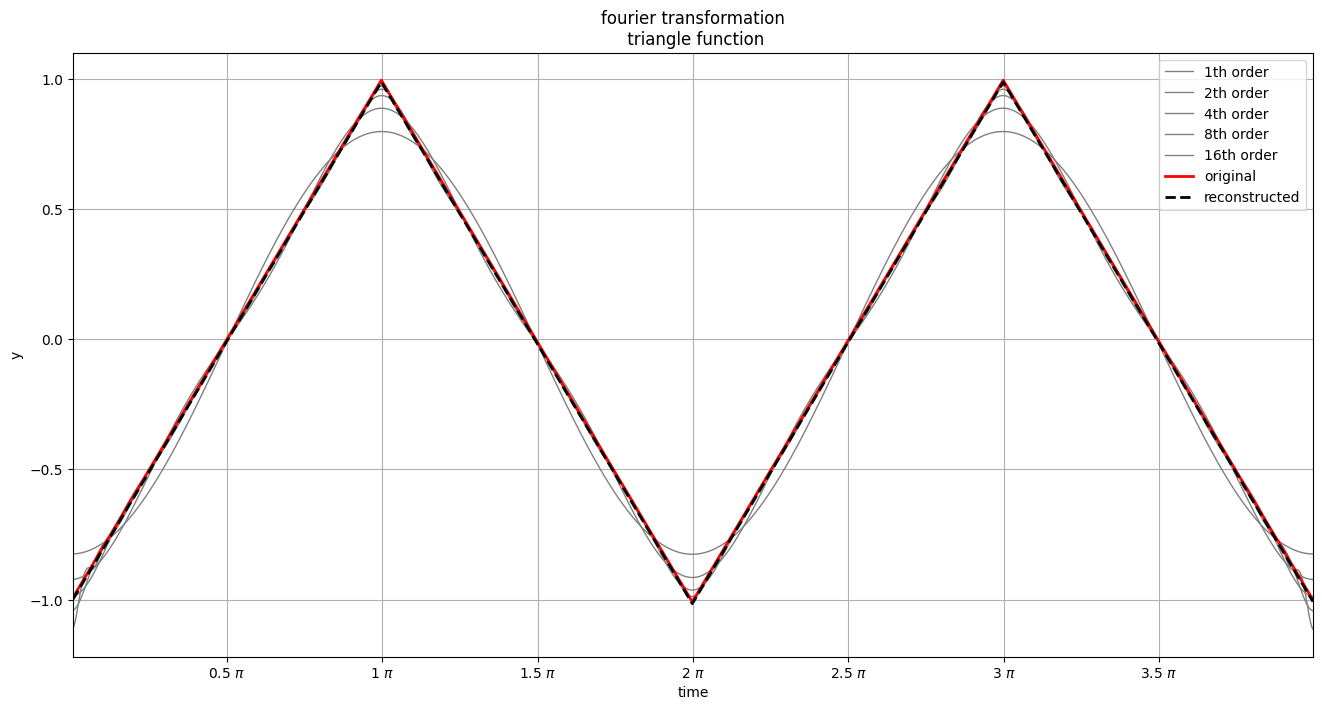

In [17]:
a,b,omega_dft = compute_fourier_transformation(t,triangle)
plot_dft(t[1:-1],a,b,omega_dft,triangle[1:-1],'triangle')

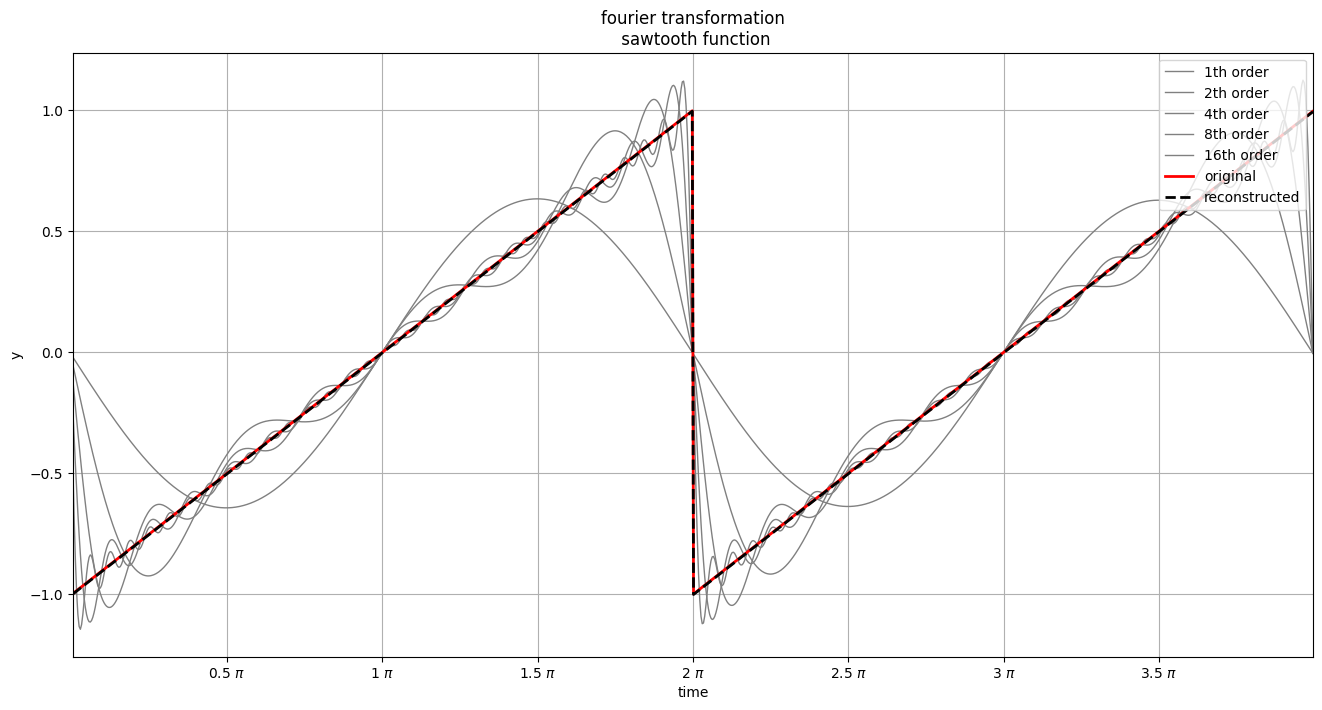

In [18]:
a,b,omega_dft = compute_fourier_transformation(t,sawtooth)
plot_dft(t[1:-1],a,b,omega_dft,sawtooth[1:-1],'sawtooth')